In [ ]:
# %matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib as mpl
from tqdm import tqdm

In [ ]:
Min, Max, N = 0.,40.,11
x = np.linspace(Min,Max,N)
y = x.copy()
h = x[1]-x[0]

In [ ]:
def h1(y):
    return 100.
def h2(y):
    return 0.
def h3(x):
    return 0.
def h4(x):
    return 0.

In [ ]:
def InitT():
    
    T = np.zeros((N,N))
    
    T[0,:] = h1(y)
    T[-1,:] = h2(y)
    
    T[:,0] = h3(x)
    T[:,-1] = h4(x)
    
    return T

In [ ]:
T = InitT()
print(T)

[[  0. 100. 100. 100. 100. 100. 100. 100. 100. 100.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]]


In [ ]:
def GetGausSeidel(T, Nit = int(1e5), tolerancia = 1e-2):
    
    itmax = 0
    
    for it in tqdm(range(Nit)):
        
        dmax = 0.
        
        for i in range(1, len(x)-1):
            for j in range(1, len(y)-1):
                r = 0.25*(T[i+1,j]+T[i-1,j]+T[i,j+1]+T[i,j-1]) - T[i, j]
                T[i,j] = 0.25*(T[i+1,j]+T[i-1,j]+T[i,j+1]+T[i,j-1])

                if np.abs(r) > dmax:
                    dmax = r
       # print(T)
       # print(it)
        
        if np.abs(dmax) < tolerancia:
            print(it)
            itmax = it
            break
            
    return T,itmax

In [ ]:
T = InitT()
Tf1,_ =  GetGausSeidel(T)

  0%|          | 58/100000 [00:00<00:34, 2934.18it/s]

58


In [ ]:
def GetRelaxation(T, Nit = int(1e5), omega = 1.9, tolerancia = 1e-2):
    
    itmax = 0
    
    for it in tqdm(range(Nit)):
        
        dmax = 0.
        
        for i in range(1, len(x)-1):
            for j in range(1, len(y)-1):
                prom = 0.25*(T[i+1,j]+T[i-1,j]+T[i,j+1]+T[i,j-1])
                T[i,j] = prom*omega + (1-omega)*T[i,j]
                if np.abs(r) > dmax:
                    dmax = r
       # print(T)
       # print(it)
        
        if np.abs(dmax) < tolerancia:
            print(it)
            itmax = it
            break
            
    return T,itmax

In [ ]:
def GetRelaxation(T, Nit = int(1e5), omega = 1.9, tolerancia = 1e-2):
    
    itmax = 0
    
    for it in tqdm(range(Nit)):
        
        dmax = 0.
        
        for i in range(1, len(x)-1):
            for j in range(1, len(y)-1):
                prom = 0.25*(T[i+1,j]+T[i-1,j]+T[i,j+1]+T[i,j-1])
                r = omega*(prom - T[i,j])
                T[i,j] = omega*prom + (1-omega)*T[i, j]
                if np.abs(r) > dmax:
                    dmax = r
       # print(T)
       # print(it)
        
        if np.abs(dmax) < tolerancia:
            print(it)
            itmax = it
            break
            
    return T,itmax

In [ ]:
T = InitT()
Tf1,_ =  GetRelaxation(T)

  0%|          | 64/100000 [00:00<00:32, 3039.76it/s]

64


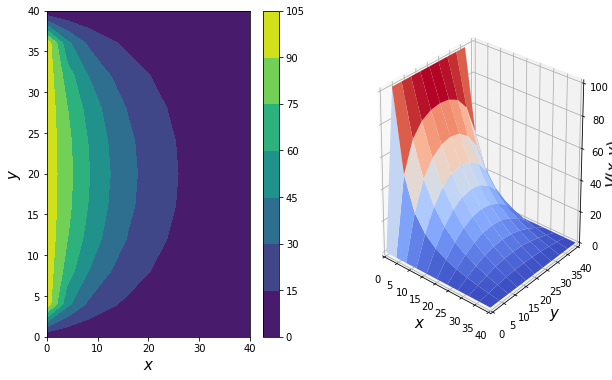

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2, projection = '3d', elev = 25, azim = -50)

X,Y = np.meshgrid(x,y)
c = ax.contourf(X,Y,Tf1.T)
ax.set_xlabel(r'$x$', fontsize=15)
ax.set_ylabel(r'$y$', fontsize=15)
fig.colorbar(c, ax = ax)

ax1.set_xlim3d(0, 40)
ax1.set_ylim3d(0, 40)

ax1.set_xlabel(r'$x$', fontsize=15)
ax1.set_ylabel(r'$y$', fontsize=15)
ax1.set_zlabel(r'$V(x,y)$', fontsize=15)

ax1.plot_surface(X, Y, Tf1.T, cmap=cm.coolwarm)
plt.show()

In [ ]:
# campo electrico
u,v = np.gradient(T)
u = - u
v = - v

In [ ]:
def GetGrad(T):
    
    M,N = T.shape
    
    u_ = np.zeros_like(T)
    v_ = np.zeros_like(T)
    
    for i in range(M):
        for j in range(N):
            
            if j == 0:
                v_[i,j] = T[i,j+1] - T[i,j]
            elif j == N - 1:
                v_[i,j] = T[i,j] - T[i,j-1]
            else:
                v_[i,j] = (T[i,j+1] - T[i,j-1])/2.
                
                
            if i == 0:
                u_[i,j] = T[i+1,j] - T[i,j]
            elif i == M - 1:
                u_[i,j] = T[i,j] - T[i-1,j]
            else:
                u_[i,j] = (T[i+1,j] - T[i-1,j])/2.
                
                
    return u_,v_

In [ ]:
u1, v1 = GetGrad(T)
u1 = - u1
v1 = - v1

In [ ]:
for i in range(T.shape[0]):
    print(i)
    print(v[i])
    print(v1[i])

0
[-100.  -50.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   50.  100.]
[-100.  -50.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   50.  100.]
1
[-4.88796363e+01 -3.37278856e+01 -1.32629739e+01 -5.70217038e+00
 -2.22118472e+00 -1.62630811e-03  2.21841438e+00  5.70077116e+00
  1.32636171e+01  3.37309111e+01  4.88838904e+01]
[-4.88796363e+01 -3.37278856e+01 -1.32629739e+01 -5.70217038e+00
 -2.22118472e+00 -1.62630811e-03  2.21841438e+00  5.70077116e+00
  1.32636171e+01  3.37309111e+01  4.88838904e+01]
2
[-2.80676890e+01 -2.27727636e+01 -1.36240899e+01 -7.32574302e+00
 -3.18111382e+00 -2.94179147e-03  3.17610261e+00  7.32321200e+00
  1.36252535e+01  2.27782364e+01  2.80753843e+01]
[-2.80676890e+01 -2.27727636e+01 -1.36240899e+01 -7.32574302e+00
 -3.18111382e+00 -2.94179147e-03  3.17610261e+00  7.32321200e+00
  1.36252535e+01  2.27782364e+01  2.80753843e+01]
3
[-1.78532544e+01 -1.56772087e+01 -1.11381093e+01 -6.79728987e+00
 -3.17472460e+00 -3.85047961e-03  3.16816548e+00  6.79397706e+00
  1.11

In [ ]:
def GetGradConv(T):
    
     
    M,N = T.shape
    
    u_ = np.zeros_like(T)
    v_ = np.zeros_like(T)
    
 
    kernel1 = np.array([-1.,1.])
    kernel2 = np.array([-1.,0.,1.])
    
    T1 = np.zeros((M+2,N+2))
    T1[1:-1,1:-1] = T
    
 #   print(np.round(T1,3))
    
    for i in range(1,M+1):
        for j in range(1,N+1):
            
                
            if j == 1:
                Reducida1 = T1[i,j:j+2]
             #   print(Reducida1,i,j,kernel1)
                v_[i-1,j-1] = np.sum(Reducida1*kernel1)
            
            elif j == N:
                Reducida3 = T1[i,j-1:j+1]
             #   print(Reducida3,i,j,kernel1)
                v_[i-1,j-1] = np.sum(Reducida3*kernel1)
                  
            else:
                Reducida2 = T1[i,j-1:j+2]
              #  print(Reducida2,i,j,kernel2)
                v_[i-1,j-1] = np.sum(Reducida2*kernel2)/2.

    for j in range(1,N+1):
        for i in range(1,M+1):
            
                
            if i == 1:
                Reducida1 = T1[i:i+2,j]
              #  print(Reducida1,i,j,kernel1)
                u_[i-1,j-1] = np.sum(Reducida1*kernel1)
            
            elif i == N:
                Reducida3 = T1[i-1:i+1,j]
              #  print(Reducida3,i,j,kernel1)
                u_[i-1,j-1] = np.sum(Reducida3*kernel1)
                  
            else:
                Reducida2 = T1[i-1:i+2,j]
              #  print(Reducida2,i,j,kernel2)
                u_[i-1,j-1] = np.sum(Reducida2*kernel2)/2.
 
    
    return u_,v_

In [ ]:
u2, v2 = GetGradConv(T)
u2 = - u2
v2 = - v2

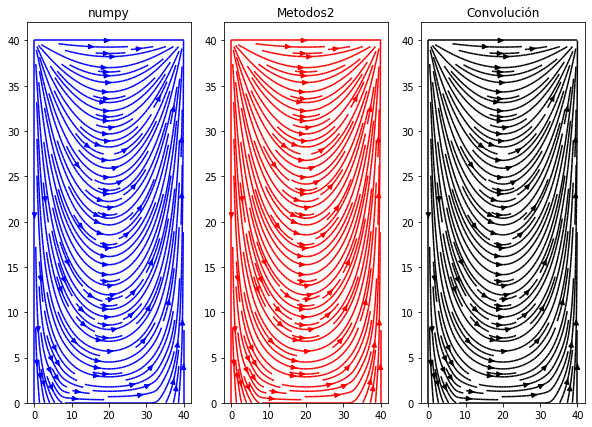

In [ ]:
fig2 = plt.figure(figsize=(10,7))
ax = fig2.add_subplot(1,3,1)
ax1 = fig2.add_subplot(1,3,2)
ax2 = fig2.add_subplot(1,3,3)
ax.set_title('numpy')
ax.streamplot(x,y,u,v,color='b',density=2)
ax1.set_title('Metodos2')
ax1.streamplot(x,y,u1,v1,color='r',density=2)
ax2.set_title('Convolución')
ax2.streamplot(x,y,u2,v2,color='k',density=2)

**Reference:** Profesor Manuel Alejandro Segura